# Tugas Pagerank



1.   Buat graph berarah dengan NetworkX (minimal 9 node )
  *   Hitung manual pagerank dari graph yang anda buat
  *   Hitung pagerank menggunakan NetworkX
2.   Implementasikan ulang  https://github.com/Shakunni/Extractive-Text-Summarization/blob/master/extractive_summarizer.ipynb
  *   Jelaskan prosesnya
  *   Upload di github repository webstatis masing masing 
  



## Perhitungan Pagerank (Manual dan NetworkX)

### Pembuatan Graph minimal 9 nodes

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.Graph()
G.add_edges_from([(1,2),(1,3),(1,4),(2,3),(3,4),(4,5),(4,6),(5,6),(5,7),(5,8),(6,7),(6,8),(7,8),(7,9)])

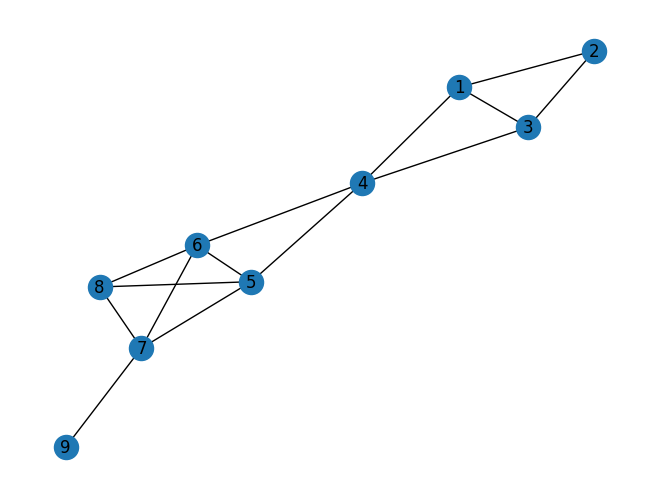

In [3]:
nx.draw(G, with_labels=True)
plt.show()

### Perhitungan Pagerank Secara Manual

In [4]:
d = 0.85 # Damping factor
max_iter = 100 # iterasi maksimum
tolerance = 1.0e-6 # Toleransi konvergensi
N = len(G.nodes())
pagerank = dict.fromkeys(G.nodes(), 1.0/N)
for i in range(max_iter):
    diff = 0
    for node in G.nodes():
        rank = 1 - d
        for neighbor in G.neighbors(node):
            rank += d * pagerank[neighbor] / G.degree(neighbor)
        diff += abs(pagerank[node] - rank)
        pagerank[node] = rank
    if diff < N * tolerance:
        break

print("Manual pagerank:\n", pagerank)

Manual pagerank:
 {1: 0.9976409644640096, 2: 0.7153297101921915, 3: 0.9976414752804466, 4: 1.2280550499924572, 5: 1.2064128853233231, 6: 1.2064130819512038, 7: 1.2882511897618658, 8: 0.9364788958702334, 9: 0.4237533778243965}


### Perhitungan Pagerank dengan NetworkX

In [5]:
pg = nx.pagerank(G, alpha=0.85)
print("Networkx pagerank:\n", pg)

Networkx pagerank:
 {1: 0.11085242532970185, 2: 0.07948362274014723, 3: 0.11085242532970185, 4: 0.13645209029225677, 5: 0.13404444415308828, 6: 0.13404444415308828, 7: 0.14313616991007672, 8: 0.10405142282202429, 9: 0.04708295526991471}


## Implementasi Text Summarization pada Python

### Import Modul

In [6]:
!pip install PyPDF2
!pip install docx2txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3977 sha256=d647c8e1ab06982bf522357c0916429be06883b8fe28763296d70e65844a872b
  Stored in directory: /root/.cache/pip/wheels/40/75/01/e6c444034338bde9c7947d3467807f889123465c2371e77418
Successfully built docx2txt


In [7]:
import numpy as np
import PyPDF2
import docx2txt
import sys
from nltk.tokenize.punkt import PunktSentenceTokenizer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

### Fungsi untuk Membaca Dokumen

In [8]:
def readDoc(name):

    # now read the type of document
    if name.lower().endswith('.txt'):
        choice = 1
    elif name.lower().endswith('.pdf'):
        choice = 2
    else:
        choice = 3
        # print(name)
    # print(choice)
    # Case 1: if it is a .txt file
        
    if choice == 1:
        f = open(name, 'r', encoding="utf8")
        document = f.read()
        f.close()
            
    # Case 2: if it is a .pdf file
    elif choice == 2:
        pdfFileObj = open(name, 'rb', encoding="utf8")
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pageObj = pdfReader.getPage(0)
        document = pageObj.extractText()
        pdfFileObj.close()
    
    # Case 3: none of the format
    else:
        print('Failed to load a valid file')
        print('Returning an empty string')
        document = ''
    
    # print(type(document))
    return document

### Fungsi untuk Melakukan Tokenisasi kepada Dokumen

In [9]:
def tokenize(document):
    # Tokenisasi menggunakan PunktSentenceTokenizer
    # Kita panggil semua instance sebagai sentence_tokenizer
    doc_tokenizer = PunktSentenceTokenizer()
    
    # tokenize() method: Mengambil dokumen sebagai input dan mengembalikan list semua kalimat didalam dokumen.
    
    # Sentences adalah sebuah list yang mengandung setiap kalimat dari dokumen
    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

### Pembacaan Dokumen

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
document = readDoc('/content/drive/MyDrive/prosainsdata/teks.txt')
print('The length of the file is:', end=' ')
print(len(document))

The length of the file is: 537


### Generate List untuk Setiap Kata pada Dokumen

In [12]:
sentences_list = tokenize(document)

# Menampilkan jumlah memori yang digunakan untuk list
print('Ukuran list dalam bytes: {}'.format(sys.getsizeof(sentences_list)))

# Menampilkan ukuran satu list
print('Ukuran satu list dalam bytes: {}'.format(sys.getsizeof(sentences_list[0])))

Ukuran list dalam bytes: 112
Ukuran satu list dalam bytes: 88


### Print Tipe Data dan Analisis Elemen dalam Kalimat

In [13]:
print(type(sentences_list))
print('Ukuran list "sentences": {}'.format(len(sentences_list)))

<class 'list'>
Ukuran list "sentences": 7


### Print Elemen dalam List

In [14]:
for i in sentences_list:
    print(i)

Hari ini adalah hari Minggu yang cerah.
Langit biru terbentang luas di atas kepala, memantulkan cahaya matahari yang hangat.
Di sekitar saya, pepohonan hijau bergoyang-goyang karena angin yang sepoi-sepoi.
Saya merasa rileks dan tenang di tengah alam yang indah ini.
Saya mengambil napas dalam-dalam dan merasakan udara segar memasuki paru-paru saya.
Sejenak saya merenungkan betapa beruntungnya saya bisa menikmati keindahan alam ini.
Saya berharap setiap orang juga bisa merasakan ketenangan dan kebahagiaan yang saya rasakan saat ini.


### Generate term-document matrix (TD matrix) dari data

In [15]:
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)

In [17]:
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())

[[0.36106342 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.36106342
  0.         0.         0.         0.         0.         0.72212684
  0.         0.         0.22242207 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.36106342 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.19483551]
 [0.         0.         0.         0.30436616 0.         0.
  0.         0.         0.30436616 0.         0.30436616 0.
  0.         0.         0.21595689 0.         0.30436616 0.
  0.         0.         0.         0.         0.         0.
  0.         0.30436616 0.         0.30436616 0.30436616 0.30436616
  0.30436616 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.   

In [18]:
print(normal_matrix.T.toarray)
res_graph = normal_matrix * normal_matrix.T

<bound method _cs_matrix.toarray of <56x7 sparse matrix of type '<class 'numpy.float64'>'
	with 74 stored elements in Compressed Sparse Column format>>


### Menentukan Rank untuk Setiap Kalimat Menggunakan textrank

In [26]:
nx_graph = nx.from_scipy_sparse_array(res_graph)

In [31]:
ranks = nx.pagerank(nx_graph)

# Analisis tipe data dari rank
print(type(ranks))
print('The size used by the dictionary in Bytes is: {}'.format(sys.getsizeof(ranks)))

# print ranks
for i in ranks:
    print(i, ranks[i])

<class 'dict'>
The size used by the dictionary in Bytes is: 360
0 0.12984337376203686
1 0.12928511702434828
2 0.13625728328644748
3 0.16210097158456632
4 0.1350656004991037
5 0.14849035774607258
6 0.15895729609742507


### Menemukan Kalimat Penting dan Menentukan Kesimpulan

In [22]:
sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)

In [23]:
rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])

temp_array = []

# Jika semua kalimat memiliki rank yang sama. Maka kalimat tersebut dianggap sama
# Mengambil kalimat manapun tidak ada masalah
flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1

# Jika kalimat memiliki rank yang berbeda
if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))
threshold = (sum(temp_array) / len(temp_array)) + 0.2
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

### Menjadikan Kesimpulan ke dalam File Baru

In [29]:
summary = " ".join(str(x) for x in sentence_list)
print(summary)
f = open('final.txt', 'a+')
f.write('\n')
f.write(summary)
f.close

Saya merasa rileks dan tenang di tengah alam yang indah ini. Saya berharap setiap orang juga bisa merasakan ketenangan dan kebahagiaan yang saya rasakan saat ini.


<function TextIOWrapper.close()>

In [30]:
for i in sentence_list:
    print(i)

Saya merasa rileks dan tenang di tengah alam yang indah ini.
Saya berharap setiap orang juga bisa merasakan ketenangan dan kebahagiaan yang saya rasakan saat ini.
